# K Nearest Neighbours

We will predict the class for new data point by using KNN to create a model

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Importing the Data

In [18]:
df= pd.read_csv("Classified Data",index_col=0)

In [19]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardization of Variables
When we find the distance for knn, scaling is necessary so each variable has equal effect

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_features= scaler.transform(df.drop('TARGET CLASS', axis=1))

In [31]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [32]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Training Testing Split

In [34]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['TARGET CLASS'],
                                                    test_size=0.30)

## KNN classifier Prediction

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn= KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
pred= knn.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

## Evaluation

In [51]:
print(confusion_matrix(y_test,pred))

[[147  14]
 [  7 132]]


In [53]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       161
          1       0.90      0.95      0.93       139

avg / total       0.93      0.93      0.93       300



## Choosing K Value(Elbow Method)

In [60]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

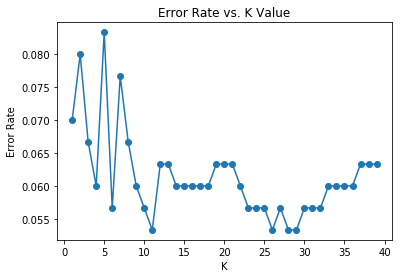

In [66]:
plt.plot(range(1,40),error_rate, marker= 'o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We see a sharp fall at k=11, The error rate tends to hove around 0.06 and 0.55 when k>25

In [71]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)

print("when k=1")
print("\n")
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

when k=1


[[147  14]
 [  7 132]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93       161
          1       0.90      0.95      0.93       139

avg / total       0.93      0.93      0.93       300



In [72]:
knn= KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)

print("when k=28")
print("\n")
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

when k=28


[[149  12]
 [  4 135]]


             precision    recall  f1-score   support

          0       0.97      0.93      0.95       161
          1       0.92      0.97      0.94       139

avg / total       0.95      0.95      0.95       300

